# Handwritten Digit classfication using Artificial Neural Network (ANN)

We will build an Artificial Neural Network (ANN) to classify handwritten digits (0-9) from MNIST dataset

## Step 1: Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.20.0


### Step 2: Load the MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Dataset loaded!")

Dataset loaded!


### check the shape of the loaded dataset

In [3]:
print(f"X_train: {x_train.shape}")
print(f"X_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"Image shape: {x_train[1].shape} ")

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)
Image shape: (28, 28) 


### Step 3: visualize the sample images

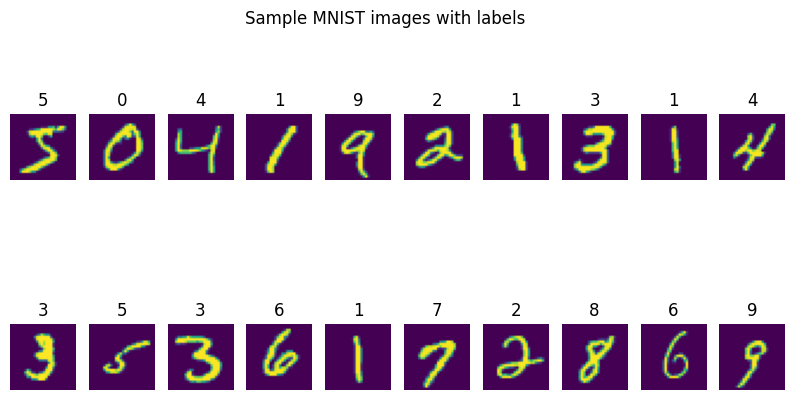

In [4]:
plt.figure(figsize = (10, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.suptitle("Sample MNIST images with labels")
plt.show()

### Check the maximum and minimum pixel value of the image

In [5]:
x_train.max()

np.uint8(255)

In [6]:
x_train.min()

np.uint8(0)

### see the unique value of the y_train

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Step 4: Preprocess the data

#### flatten the data into 1D vector

In [8]:
# x_train[0]


In [9]:
x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

In [10]:
x_train_flat.shape

(60000, 784)

In [11]:
x_test_flat.shape

(10000, 784)

#### Normalize to [0, 1]

In [12]:
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

In [13]:
x_train_flat[0].max()

np.float32(1.0)

In [14]:
x_train_flat[0].min()

np.float32(0.0)

### Step 5: Build the ANN model

#### Basic architecture: input -> output

In [15]:

# model = Sequential([
#     # Input (784) → Output (10)
#     layers.Dense(32, activation='softmax', input_shape=(784,), name='output')
# ], name='mnist_basic_model')

# model.summary()

In [16]:

model = Sequential([
    # Input (784) → Output (10)
    layers.Dense(32, activation='relu', input_shape=(784,), name='hidden'),
    layers.Dense(10, activation = 'softmax', name = 'output')
], name='mnist_model')

model.summary()

f:\AI_ML_classes\mlenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Compile the model

In [17]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

print("Model compiled successfully ")
print(f"  Optimizer     : Adam")
print(f"  Loss Function : Sparse categorical cross entropy")
print(f"  Metric        : Accuracy")

Model compiled successfully 
  Optimizer     : Adam
  Loss Function : Sparse categorical cross entropy
  Metric        : Accuracy


### Step 7: Train the model

In [18]:
history = model.fit(
    x_train_flat, y_train,
    epochs=20,
    batch_size = 32,
    validation_split=0.1
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8956 - loss: 0.3673 - val_accuracy: 0.9468 - val_loss: 0.1897
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9426 - loss: 0.2001 - val_accuracy: 0.9578 - val_loss: 0.1524
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9531 - loss: 0.1590 - val_accuracy: 0.9638 - val_loss: 0.1338
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9604 - loss: 0.1341 - val_accuracy: 0.9650 - val_loss: 0.1249
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9660 - loss: 0.1159 - val_accuracy: 0.9635 - val_loss: 0.1212
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1045 - val_accuracy: 0.9678 - val_loss: 0.1171
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0940 - val_accuracy: 0.9698 - val_loss: 0.1059
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9740 - loss: 0.0858 -

### step 8: Plot training curves

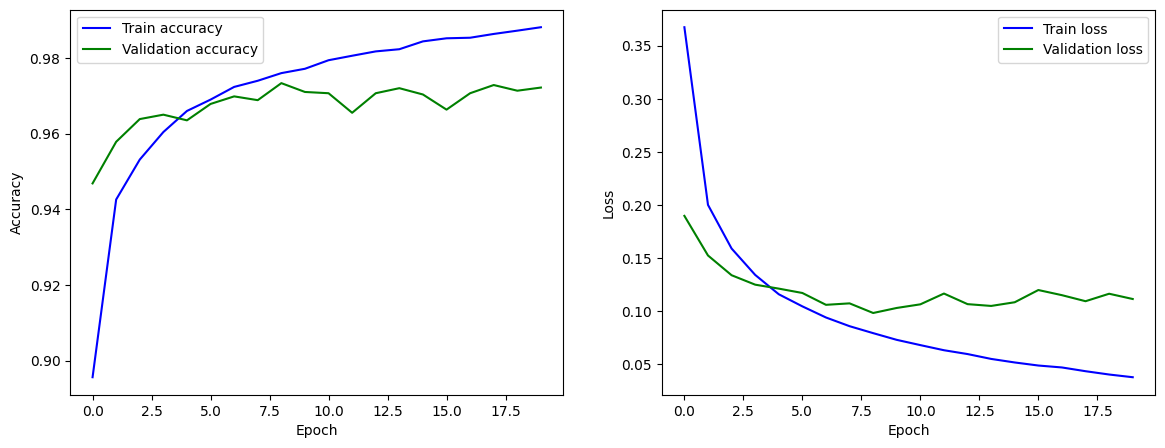

In [19]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train accuracy", color = 'blue')
plt.plot(history.history['val_accuracy'], label="Validation accuracy", color = 'green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train loss", color = 'blue')
plt.plot(history.history['val_loss'], label="Validation loss", color = 'green')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()



### Evaluate on test set

In [20]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)

print(f"   Test Accuracy : {test_accuracy * 100:.2f}%")
print(f"   Test Loss     : {test_loss:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.1218
   Test Accuracy : 96.93%
   Test Loss     : 0.1218


### Get prediction

In [21]:
# Get predictions
y_pred_probs = model.predict(x_test_flat, verbose=0)


In [22]:
y_test[0]

np.uint8(7)

In [23]:
y_pred_probs[0].argmax()

np.int64(7)

In [24]:
y_pred       = np.argmax(y_pred_probs, axis=1)   # Pick the class with highest probability

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[ 966,    1,    2,    0,    0,    1,    5,    2,    1,    2],
       [   0, 1123,    4,    0,    0,    2,    2,    1,    2,    1],
       [   6,    2,  995,    4,    1,    0,    4,    6,   14,    0],
       [   1,    2,    5,  958,    3,   18,    1,   10,    9,    3],
       [   0,    1,    4,    0,  951,    2,    8,    2,    1,   13],
       [   3,    3,    1,    7,    1,  863,    6,    0,    6,    2],
       [   5,    3,    2,    0,    4,    2,  941,    0,    1,    0],
       [   1,    5,   11,    0,    2,    1,    1,  998,    6,    3],
       [   4,    2,    4,    4,    5,    7,    7,    6,  929,    6],
       [   2,    6,    0,    6,   12,    3,    1,    6,    4,  969]])

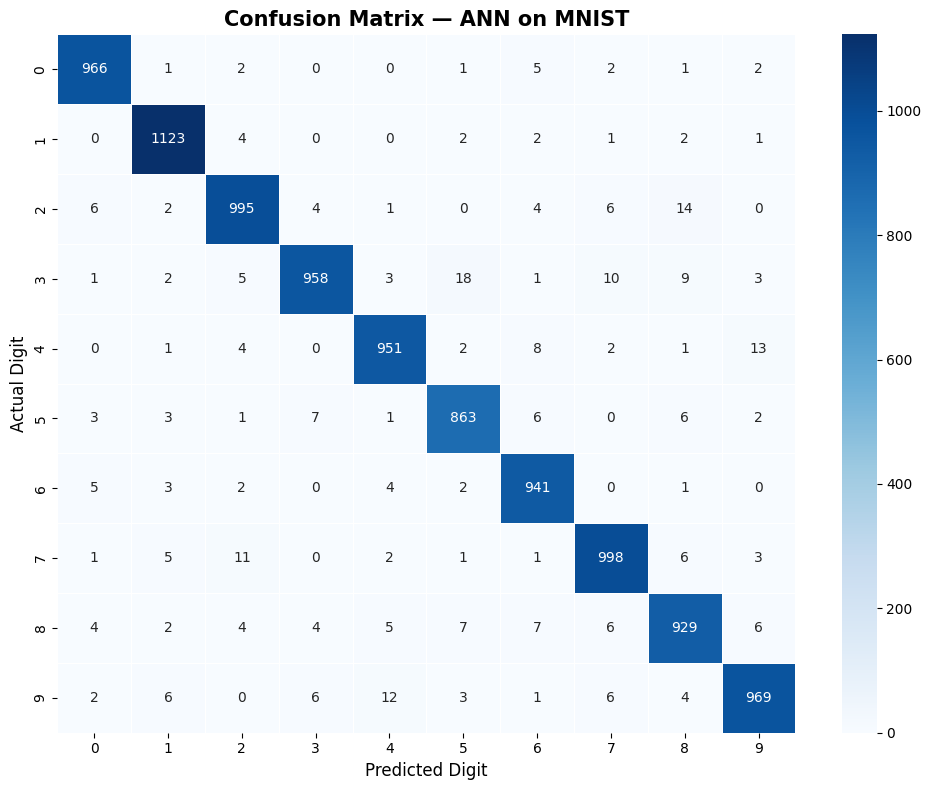

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,  fmt = 'd', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            linewidths=0.5)
plt.title('Confusion Matrix — ANN on MNIST', fontsize=15, fontweight='bold')
plt.xlabel('Predicted Digit', fontsize=12)
plt.ylabel('Actual Digit', fontsize=12)
plt.tight_layout()
plt.show()


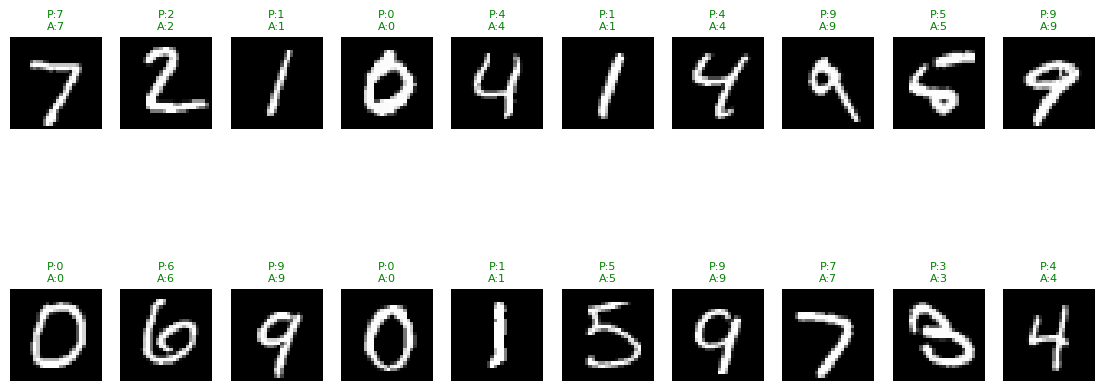

In [27]:
# Show 20 test images with their predictions
plt.figure(figsize=(14, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    pred   = y_pred[i]
    actual = y_test[i]
    color  = 'green' if pred == actual else 'red'
    plt.title(f"P:{pred}\nA:{actual}", color=color, fontsize=8)
    plt.axis('off')


### Save the model

In [28]:
model.save('mnist_ann_model.keras')